In [6]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [7]:
df=pd.read_csv('bhp.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [8]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

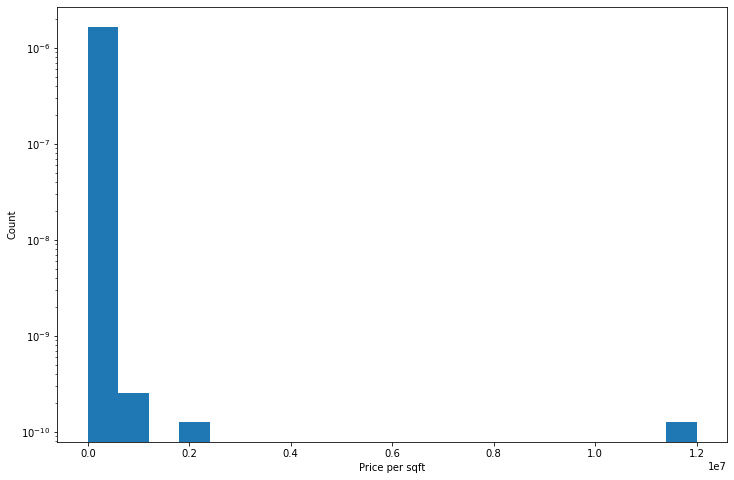

In [14]:
plt.hist(df['price_per_sqft'],bins=20,density=True)
plt.xlabel('Price per sqft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [16]:
lower_limit,upper_limit=df.price_per_sqft.quantile([0.001,0.999])
print(lower_limit)
print(upper_limit)

1366.184
50959.36200000098


In [19]:
df[(df.price_per_sqft < lower_limit) |(df.price_per_sqft > upper_limit)].shape[0]

28

In [24]:
df_p=df[(df.price_per_sqft > lower_limit) & (df.price_per_sqft < upper_limit)]
df.shape[0]-df_p.shape[0]

28

Removed total 28 outliers

(2) Now remove outliers using 4 standard deviation

In [31]:
max_limit=df_p.price_per_sqft.mean()+4*df_p.price_per_sqft.std()
min_limit=df_p.price_per_sqft.mean()-4*df_p.price_per_sqft.std()
max_limit,min_limit

(23227.73653589432, -9900.429065502582)

In [32]:
df_p[(df_p.price_per_sqft < min_limit) | (df_p.price_per_sqft > max_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [33]:
df_std=df_p[(df_p.price_per_sqft > min_limit) & (df_p.price_per_sqft < max_limit)]
df_std

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [35]:
df_p.shape[0]-df_std.shape[0]

125

Removed 125 Outliers by applying 4 std

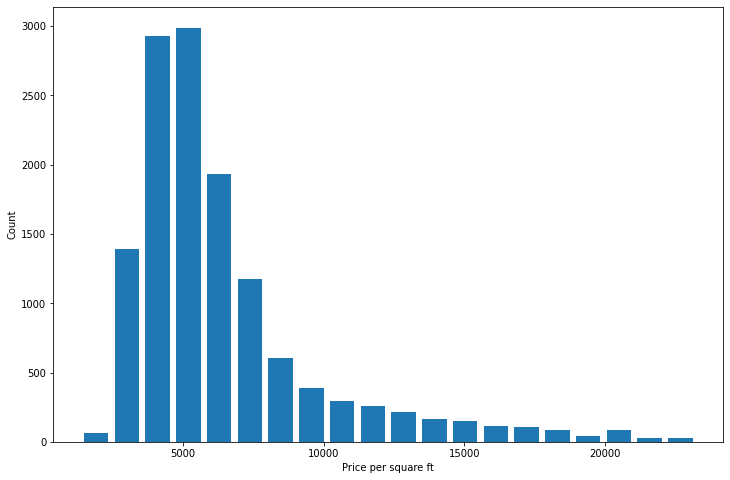

In [36]:
plt.hist(df_std.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

In [39]:
df_std['price_per_sqft'].describe()

count    13047.000000
mean      6449.328045
std       3487.670005
min       1379.000000
25%       4259.000000
50%       5415.000000
75%       7222.000000
max      23214.000000
Name: price_per_sqft, dtype: float64

Remove Outlier using Z score

In [40]:
df_std['zscore']=(df_std.price_per_sqft-df_std.price_per_sqft.mean())/df_std.price_per_sqft.std()
df_std

C:\Users\Anand\AppData\Local\Temp\ipykernel_10004\773131547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_std['zscore']=(df_std.price_per_sqft-df_std.price_per_sqft.mean())/df_std.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.788586
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.525947
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.614831
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.058586
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.630601
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.068720
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.336615
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.341583
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,1.134761


In [43]:
df_std[(df_std.zscore < -4) | (df_std.zscore >4 )]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
87,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535,4.612154
408,Mahalakshmi Layout,6 Bedroom,1200.0,7.0,250.0,6,20833,4.124149
429,7th Phase JP Nagar,8 Bedroom,1200.0,8.0,250.0,8,20833,4.124149
475,other,4 BHK,1150.0,4.0,260.0,4,22608,4.633085
925,5th Phase JP Nagar,9 Bedroom,1260.0,11.0,290.0,9,23015,4.749782
...,...,...,...,...,...,...,...,...
12084,Nagarbhavi,5 Bedroom,1200.0,5.0,260.0,5,21666,4.362991
12245,5th Phase JP Nagar,8 Bedroom,1200.0,7.0,250.0,8,20833,4.124149
12321,2nd Stage Nagarbhavi,3 Bedroom,600.0,5.0,135.0,3,22500,4.602119
12368,Koramangala,4 Bedroom,2400.0,5.0,550.0,4,22916,4.721396


In [44]:
df_zcore=df_std[(df_std.zscore > -4) | (df_std.zscore < 4 )]
df_zcore

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.788586
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.525947
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.614831
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.058586
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.630601
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.068720
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.336615
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.341583
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,1.134761


In [47]:
df_p.shape[0]-df_zcore.shape[0]

125

In this step we removed 125 outliers which is same as 4*std removal